<div style="color: #00FF00;">
    <h3>
        UNIVERSIDADE FEDERAL DO MARANHÃO<br>
        CENTRO DE CIÊNCIAS EXATAS E TECNOLOGIA - CCET<br>
        COORDENAÇÃO DO CURSO DE ENGENHARIA DA COMPUTAÇÃO - CCEC<br>
        APRENDIZADO DE MÁQUINA – Prof. Alex Oliveira Barradas Filho
    </h3>
</div>
<br>
<br>
<div style="color: #00FF00;">
    <h5>
        Francisco Elias da Silva Fernandes<br>
        Rosivânia da Silva Viana
    </h5>
</div>

In [1]:
import os
import tarfile
import urllib.request

# URL base de onde o dataset será baixado
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# Caminho local onde o dataset será salvo
HOUSING_PATH = os.path.join("datasets", "housing")
# URL completa do arquivo .tgz
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Função para baixar e extrair os dados
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Chama a função para baixar e extrair os dados
fetch_housing_data()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Saving Figure atribute_histogram_plots


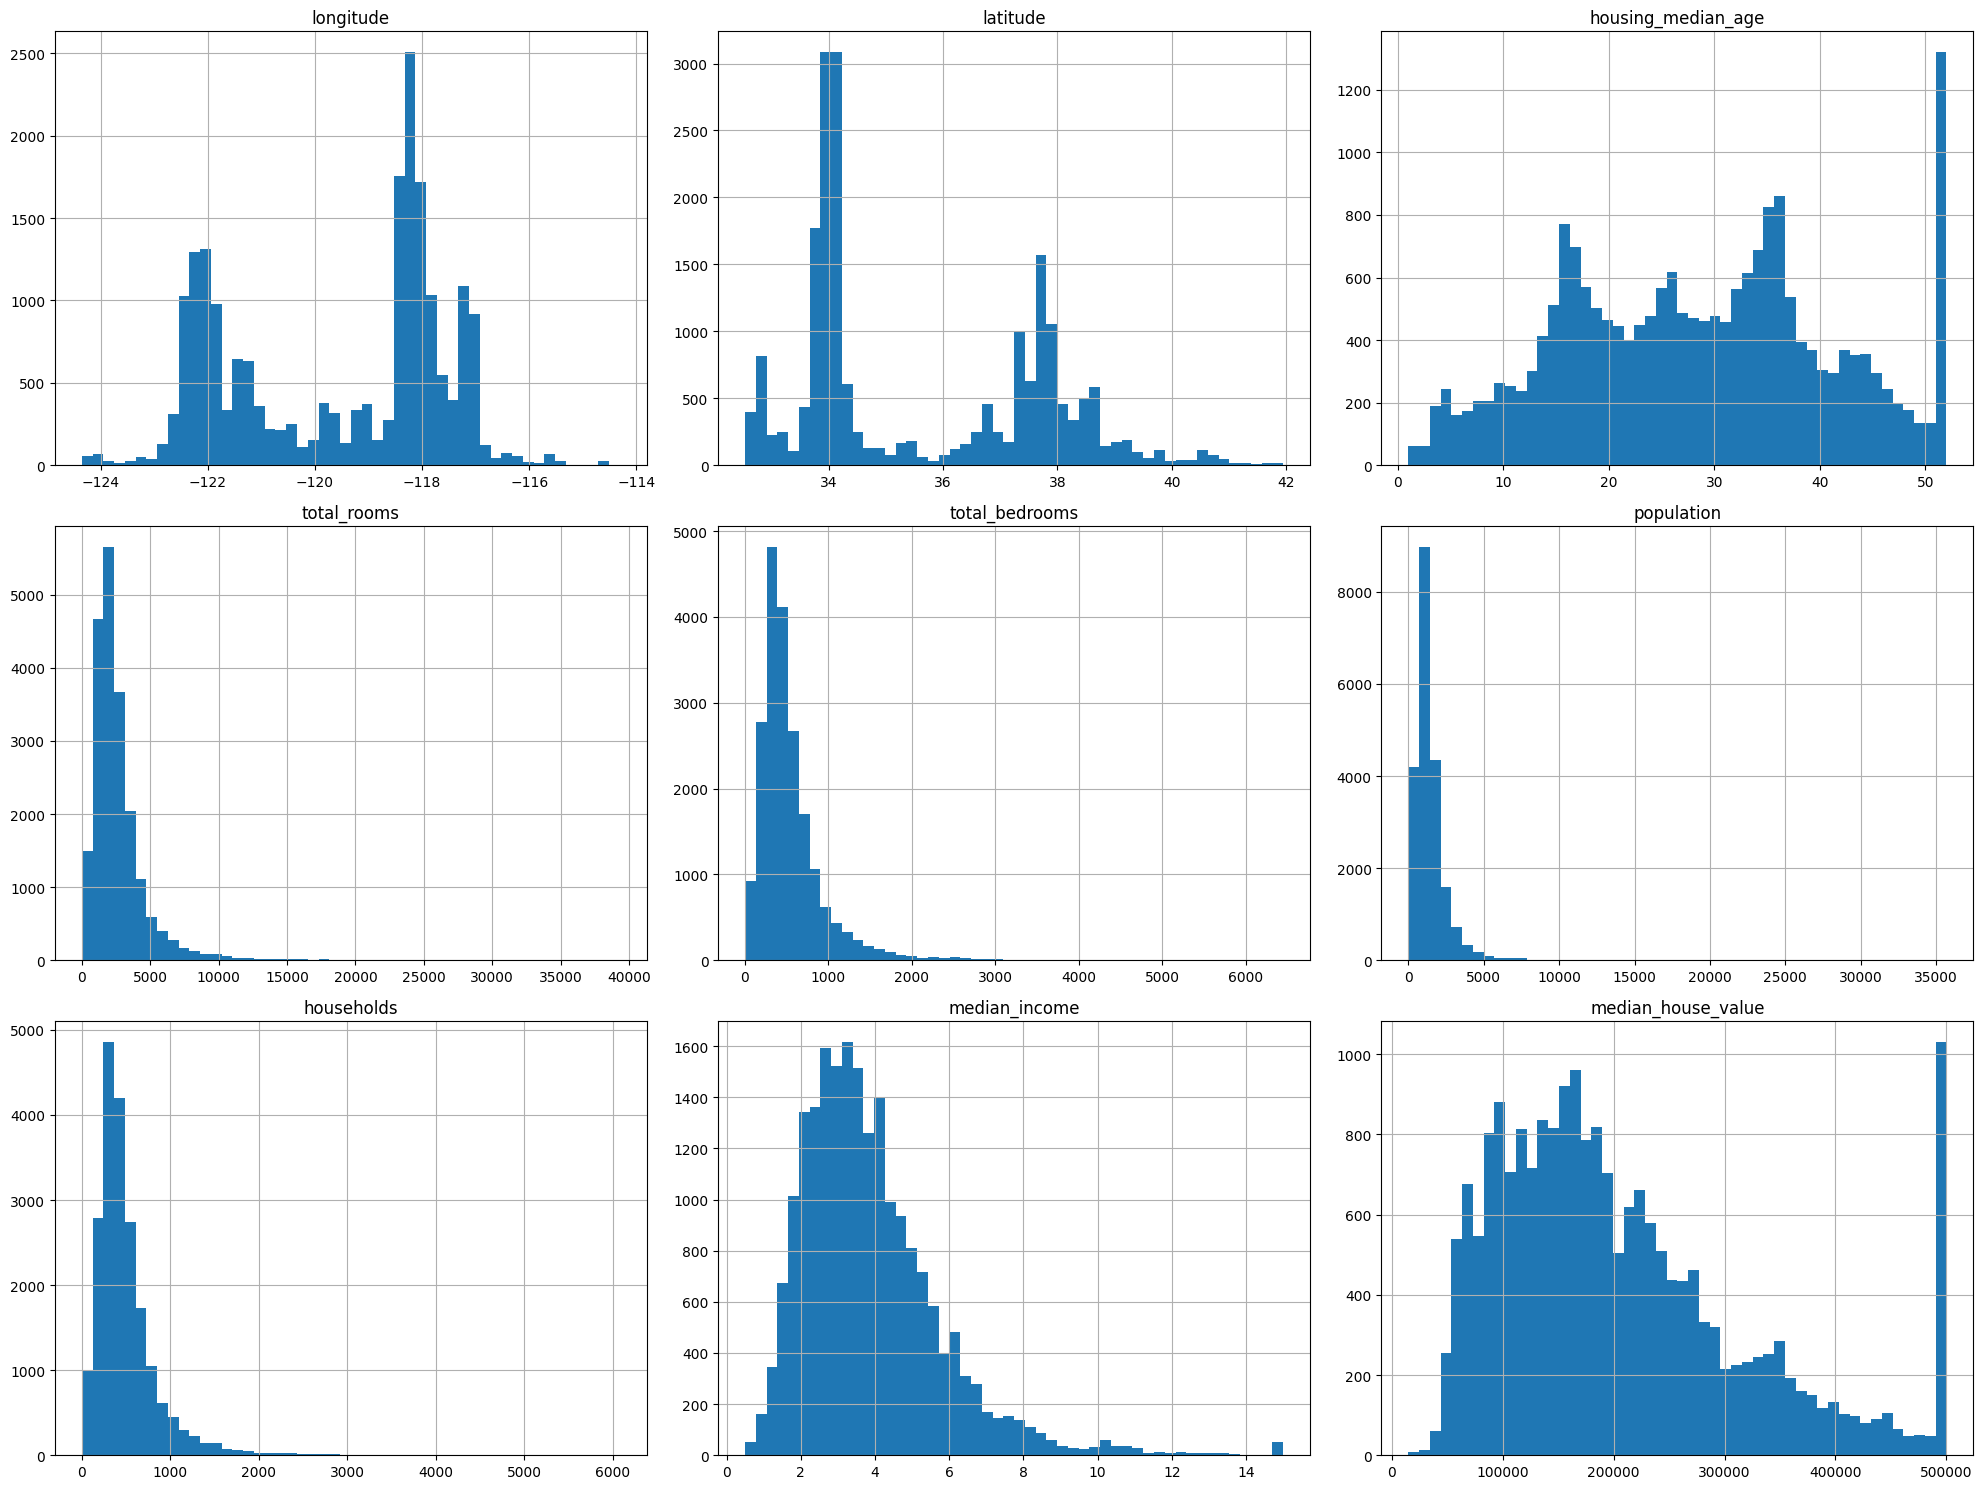

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
# Exemplo: carregando um dataset qualquer
# housing = pd.read_csv("caminho/do/dataset.csv")

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Ponta à ponta"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Geração dos histogramas
housing.hist(bins=50, figsize=(20,15))
save_fig("atribute_histogram_plots")

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

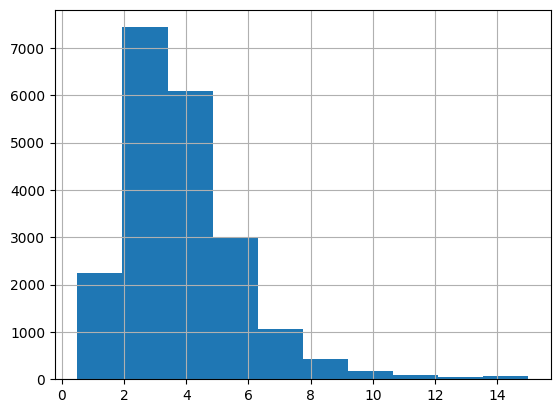

In [5]:
housing ["median_income"].hist()

In [6]:
import numpy as np

housing["income_cat"] = pd.cut(housing['median_income'],
                               bins=[0.,1.5,3.0,4.5,6., np.inf],
                               labels=[1,2,3,4,5])

housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

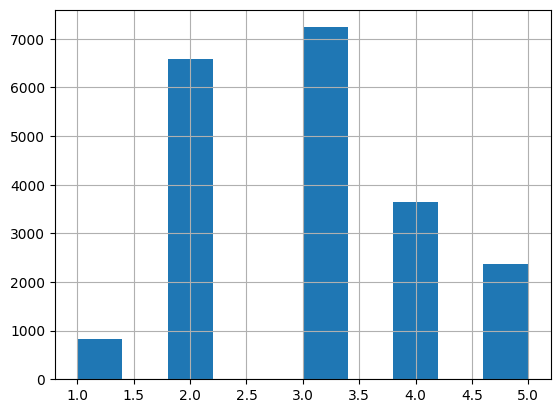

In [7]:
housing["income_cat"].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [9]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [10]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [11]:
#collapse-show
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions (housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions (test_set)}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props ["Overall"]- 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Saving Figure better_visualization_plot


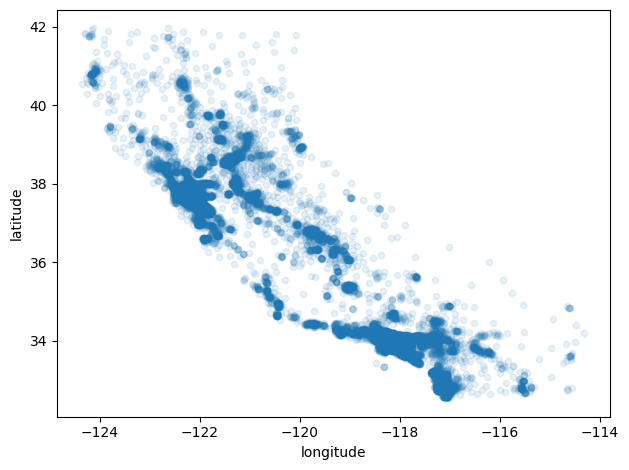

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

save_fig('better_visualization_plot')

C:\Users\elias\AppData\Local\Temp\ipykernel_23332\2811978956.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c="median_house_value", cmap=cm.get_cmap("jet"), colorbar=True,


Saving Figure housing_prices_scatterplot


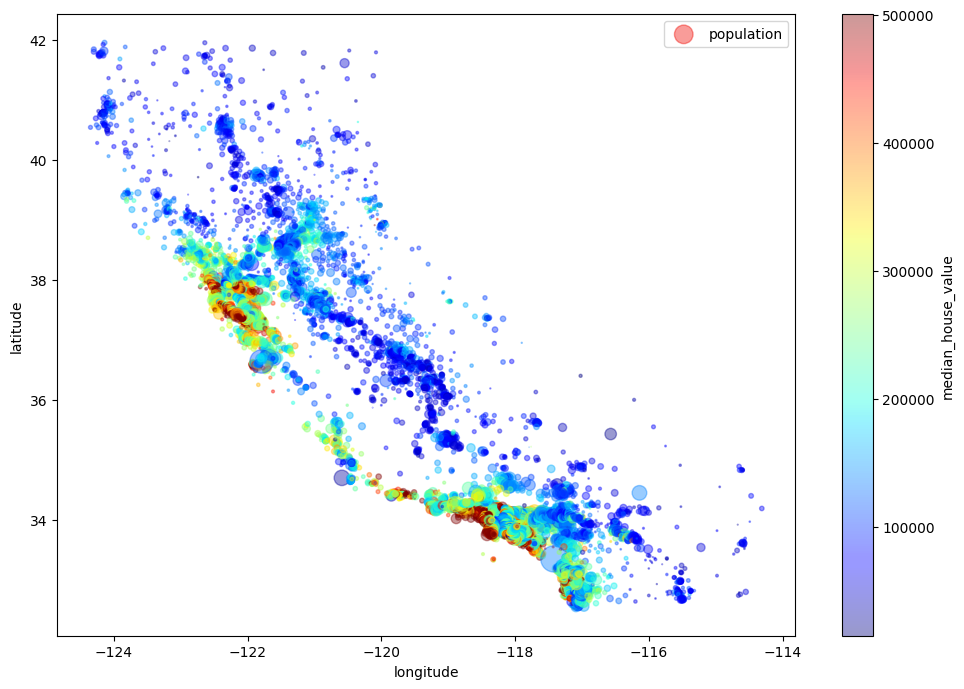

In [14]:
import matplotlib.cm as cm

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=cm.get_cmap("jet"), colorbar=True,
    sharex=False)


save_fig("housing_prices_scatterplot")

In [15]:
import os
import urllib.request

# Define o diretório onde a imagem será salva
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)

# Define a URL de onde a imagem será baixada
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)

# Cria a URL completa
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

# Faz o download da imagem para o diretório desejado
urllib.request.urlretrieve(url, os.path.join(images_path, filename))


('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1c00870fd10>)

C:\Users\elias\AppData\Local\Temp\ipykernel_23332\1857735921.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"${int(v/1000)}k" for v in tick_values], fontsize=14)


Saving Figure california_housing_prices_plot


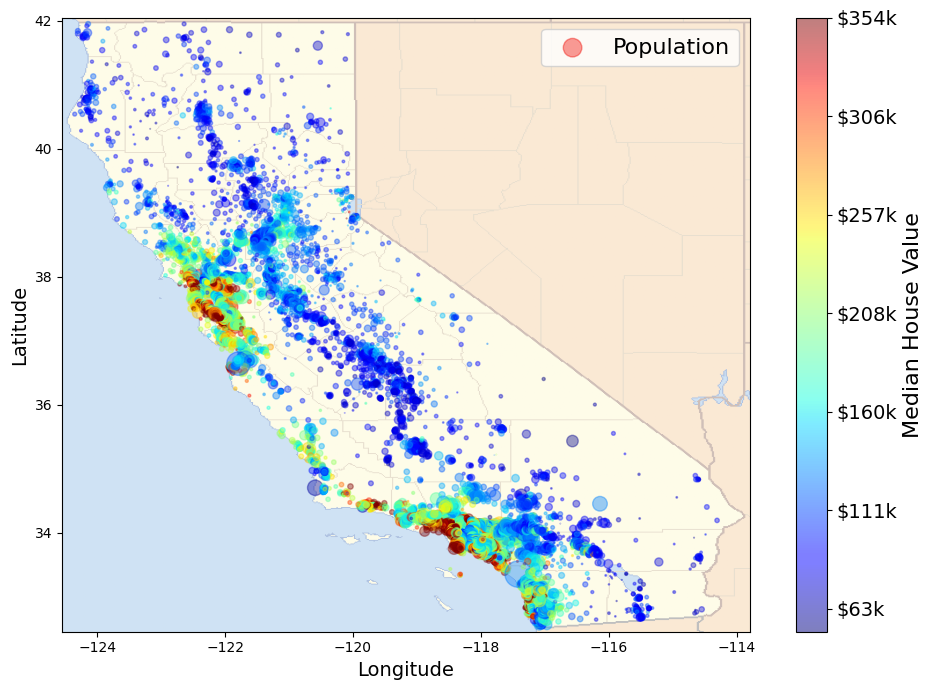

In [16]:
import matplotlib.image as mpimg

# Carrega a imagem da Califórnia
california_img = mpimg.imread(os.path.join(images_path, filename))

# Gráfico de dispersão com população e valor das casas
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
    s=housing["population"] / 100, label="Population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=False, alpha=0.4)

# Sobrepõe a imagem
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5, cmap=plt.get_cmap("jet"))

# Eixos
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Barra de cores
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels([f"${int(v/1000)}k" for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

# Legenda
plt.legend(fontsize=16)

# Salvar figura
save_fig("california_housing_prices_plot")

# Mostrar
plt.show()


In [17]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving Figure scatter_matrix_plot


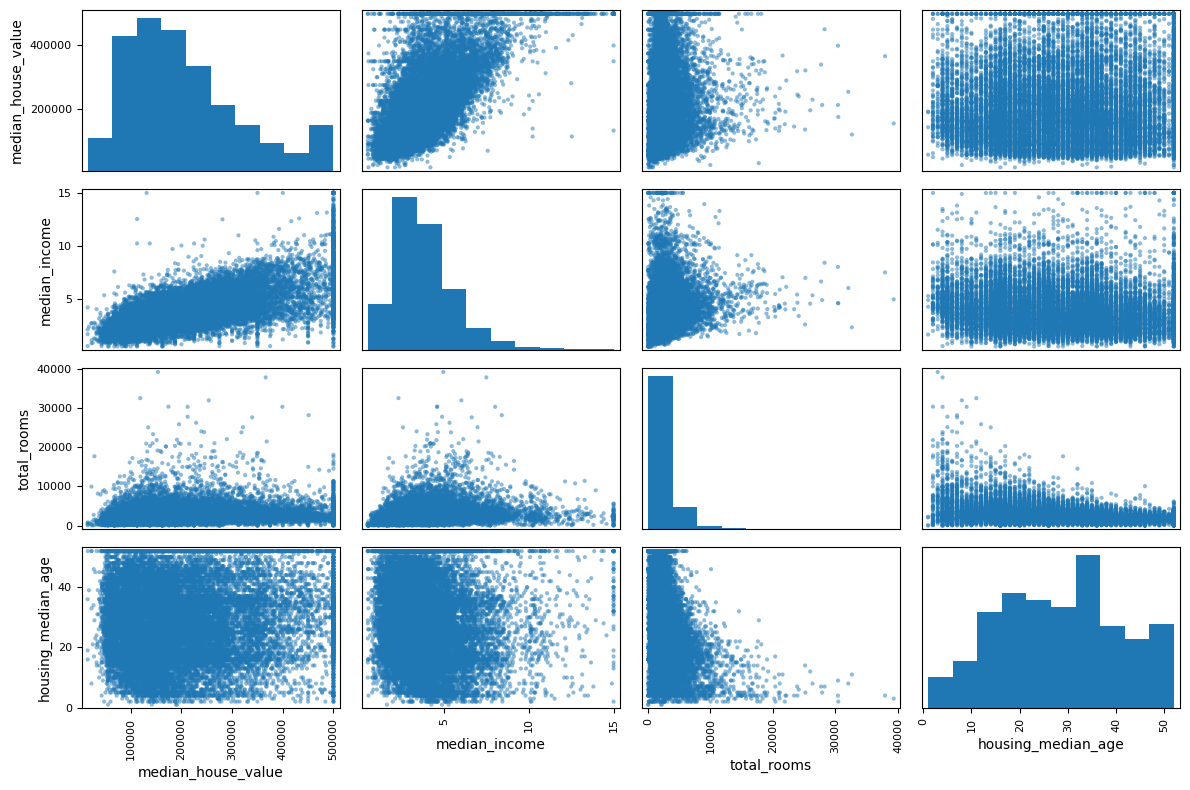

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
              'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8))

save_fig('scatter_matrix_plot')

Saving Figure income_vs_house_value_sacatterplot


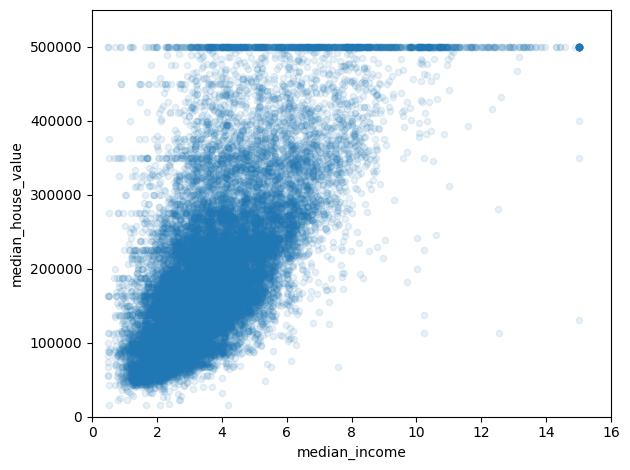

In [19]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
             alpha= 0.1)

plt.axis([0,16,0,550000])

save_fig('income_vs_house_value_sacatterplot')

In [20]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

# Cálculo da matriz de correlação (ignorando colunas não numéricas)
corr_matrix = housing.corr(numeric_only=True)

# Exibição das correlações com 'median_house_value' em ordem decrescente
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

In [22]:
sample_incomple_rows = housing[housing.isnull().any(axis=1)].head()

sample_incomple_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [25]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [26]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [27]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [31]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                     columns=list(housing.columns) +
                                     ["rooms_per_household", "population_per_household"],
                                     index=housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
])

In [33]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [34]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse_output=False), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

In [36]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
from sklearn.model_selection import KFold

KFold = KFold(n_splits=5, shuffle=True, random_state=66)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Modelos a serem avaliados
models = {
    "SVM": SVR(),
    "MLP": MLPRegressor(max_iter=1000, random_state=66),
    "DecisionTree": DecisionTreeRegressor(random_state=66)
}

# Espaços de hiperparâmetros para busca em grid
param_grids = {
    "SVM": {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],  # Adiciona 'sigmoid'
    "C": [0.01, 0.1, 1, 10, 100, 1000],              # Mais granularidade
    "gamma": ["scale", "auto", 1e-4, 1e-3, 1e-2, 0.1, 1],
    "degree": [2, 3, 4]  # Somente usado com 'poly'
    },
    "MLP": {
    "hidden_layer_sizes": [
        (50,), (100,), (150,), (100, 50), (100, 100), (150, 100, 50)
    ],
    "activation": ["relu", "tanh"],  # Eliminar 'identity' e 'logistic' (menos eficientes)
    "alpha": [0.00001, 0.0001, 0.001, 0.01],  # Testar regularizações mais fortes
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": [0.0005, 0.001, 0.01],  # Novo parâmetro crítico
    "solver": ["adam"],  # Mais estável para regressão
    "max_iter": [2500]  # Fixa um valor mais alto para convergência
    },
    "DecisionTree": {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30, 40, 50, 70],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"]
    }
}

best_estimators = {}
cv_results = {}

for name, model in models.items():
    print(f"Treinando e ajustando hiperparâmetros para: {name}")
    grid_search = GridSearchCV(model, param_grids[name], cv=KFold, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(housing_prepared, housing_labels)
    best_estimators[name] = grid_search.best_estimator_
    cv_results[name] = grid_search.cv_results_

    mse = -grid_search.best_score_
    rmse = mse ** 0.5

    print(f"Melhores hiperparâmetros para {name}: {grid_search.best_params_}")
    print(f"Melhor score (neg MSE): {grid_search.best_score_}")
    print(f"RMSE: {rmse}\n")
    print("-" * 65)

# Exemplo: acessar o melhor modelo SVM
# best_estimators["SVM"]

Treinando e ajustando hiperparâmetros para: SVM
Melhores hiperparâmetros para SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Melhor score (neg MSE): -5169160287.869308
RMSE: 71896.87258754241

-----------------------------------------------------------------
Treinando e ajustando hiperparâmetros para: MLP


C:\Users\elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros para MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant'}
Melhor score (neg MSE): -3589169356.839677
RMSE: 59909.676654441035

-----------------------------------------------------------------
Treinando e ajustando hiperparâmetros para: DecisionTree
Melhores hiperparâmetros para DecisionTree: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Melhor score (neg MSE): -3558396259.2927947
RMSE: 59652.294669130664

-----------------------------------------------------------------


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepara os dados de teste
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

# Avalia cada melhor modelo no conjunto de teste
print("Avaliação dos modelos no conjunto de teste:\n")

for name, model in best_estimators.items():
    y_pred = model.predict(X_test_prepared)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Modelo: {name}")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - MAE : {mae:.2f}")
    print(f" - R²  : {r2:.4f}")
    print("-" * 40)

Avaliação dos modelos no conjunto de teste:

Modelo: SVM
 - RMSE: 69499.58
 - MAE : 48262.19
 - R²  : 0.6294
----------------------------------------
Modelo: MLP
 - RMSE: 58019.58
 - MAE : 40625.96
 - R²  : 0.7417
----------------------------------------
Modelo: DecisionTree
 - RMSE: 58383.77
 - MAE : 40333.60
 - R²  : 0.7385
----------------------------------------
